<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用重复元素的网络-VGG" data-toc-modified-id="使用重复元素的网络-VGG-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用重复元素的网络 VGG</a></span><ul class="toc-item"><li><span><a href="#VGG块" data-toc-modified-id="VGG块-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>VGG块</a></span></li><li><span><a href="#VGG网络" data-toc-modified-id="VGG网络-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>VGG网络</a></span></li></ul></li><li><span><a href="#网络中的网络" data-toc-modified-id="网络中的网络-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>网络中的网络</a></span><ul class="toc-item"><li><span><a href="#NiN块" data-toc-modified-id="NiN块-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>NiN块</a></span></li><li><span><a href="#NiN模型" data-toc-modified-id="NiN模型-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>NiN模型</a></span></li></ul></li><li><span><a href="#含并行连结的网络(GoogLeNet)" data-toc-modified-id="含并行连结的网络(GoogLeNet)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>含并行连结的网络(GoogLeNet)</a></span><ul class="toc-item"><li><span><a href="#Inception块" data-toc-modified-id="Inception块-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Inception块</a></span></li><li><span><a href="#GoogLeNet模型" data-toc-modified-id="GoogLeNet模型-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>GoogLeNet模型</a></span></li></ul></li><li><span><a href="#批量归一化" data-toc-modified-id="批量归一化-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>批量归一化</a></span><ul class="toc-item"><li><span><a href="#批量归一化层" data-toc-modified-id="批量归一化层-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>批量归一化层</a></span><ul class="toc-item"><li><span><a href="#对全连接层做批量归一化" data-toc-modified-id="对全连接层做批量归一化-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>对全连接层做批量归一化</a></span></li><li><span><a href="#对卷积层做批量归一化" data-toc-modified-id="对卷积层做批量归一化-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>对卷积层做批量归一化</a></span></li><li><span><a href="#预测时的批量归一化" data-toc-modified-id="预测时的批量归一化-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>预测时的批量归一化</a></span></li></ul></li><li><span><a href="#从零开始实现" data-toc-modified-id="从零开始实现-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>从零开始实现</a></span><ul class="toc-item"><li><span><a href="#使用批量归一化层的LeNet" data-toc-modified-id="使用批量归一化层的LeNet-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>使用批量归一化层的LeNet</a></span></li></ul></li></ul></li><li><span><a href="#残差网络(Resnet)" data-toc-modified-id="残差网络(Resnet)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>残差网络(Resnet)</a></span><ul class="toc-item"><li><span><a href="#残差块" data-toc-modified-id="残差块-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>残差块</a></span></li><li><span><a href="#稠密连接网络(DenseNet)" data-toc-modified-id="稠密连接网络(DenseNet)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>稠密连接网络(DenseNet)</a></span></li><li><span><a href="#过渡层" data-toc-modified-id="过渡层-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>过渡层</a></span></li></ul></li></ul></div>

# 使用重复元素的网络 VGG

## VGG块

VGG块的组成规律：连续使用数个相同的填充为1，窗口形状为 3x3 的卷积层后接上一个步幅为2、窗口形状为 2x2的最大池化层。卷积层保持输入的高和宽不变，而池化层则对其减半。我们使用 vgg_block函数来实现这个基础的 VGG块，它可以指定卷积层的数量和输入输出通道数。
> 对于给定的感受野(与输出有关的输入图片的局部大小)，采用堆积的小卷积核优于采用大的卷积核。

In [1]:
import time
import torch
from torch import nn,optim


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
def vgg_block(num_convs, in_channels, out_channels):
    blk = []
    for i in range(num_convs):
        if i==0:
            blk.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
        else:
            blk.append(nn.Conv2d(out_channels,out_channels,kernel_size=3,padding=1))
        blk.append(nn.ReLU())
    blk.append(nn.MaxPool2d(kernel_size=2,stride=2)) # 这里会使高宽减半
    return nn.Sequential(*blk)

In [4]:
model = vgg_block(5,6,3)
print(model,type(model))
print(model[0])

Sequential(
  (0): Conv2d(6, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
) <class 'torch.nn.modules.container.Sequential'>
Conv2d(6, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


## VGG网络

VGG网络由卷积层模块后接上全连接层模块构成。卷积层模块串联数个 vgg_block,其超参数由变量 conv_arch 定义，该变量指定了每个 VGG 块里卷积层个数和输入输出通道数。全连接模块则跟 AlexNet 中的一样。
现在构建一个 VGG 网络，它有5个卷积块，前2块使用单卷积层，而后3块使用双卷积层。第一块的输入输出通道分别是1（因为下面要使用的Fashion-MNIST数据的通道数为1）和64，之后每次对输出通道数翻倍，直到变为512。因为这个网络使用了8个卷积层和3个全连接层，所以经常被称为VGG-11。

In [5]:
conv_arch = ((1, 1, 64), (1, 64, 128), (2, 128, 256), (2, 256, 512), (2, 512, 512))
# 经过5个vgg_block, 宽高会减半5次, 变成 224/32 = 7
fc_features = 512 * 7 * 7 # c * w * h
fc_hidden_units = 4096 # 任意


下面我们实现 VGG-11


In [6]:
def vgg(conv_arch,fc_feature,fc_hidden_units=4096):
    net = nn.Sequential()
    #卷积层部分
    for i , (num_convs,in_channels,out_channels) in enumerate(conv_arch):
        net.add_module("vgg_block_" + str(i+1),vgg_block(num_convs,in_channels,out_channels))
    # 全连接层
    net.add_module("fc", nn.Sequential(
                                 nn.Linear(fc_features, fc_hidden_units),
                                 nn.ReLU(),
                                 nn.Dropout(0.5),
                                 nn.Linear(fc_hidden_units, fc_hidden_units),
                                 nn.ReLU(),
                                 nn.Dropout(0.5),
                                 nn.Linear(fc_hidden_units, 10)
                                ))
    return net

下面构造一个高和宽均为224的单通道数据样本来观察每一层的输出形状。


In [7]:
net = vgg(conv_arch, fc_features, fc_hidden_units)
print(net)

Sequential(
  (vgg_block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0,

# 网络中的网络

前几节介绍的LeNet、AlexNet和VGG在设计上的共同之处是：先以由卷积层构成的模块充分抽取空间特征，再以由全连接层构成的模块来输出分类结果。其中，AlexNet和VGG对LeNet的改进主要在于如何对这两个模块加宽（增加通道数）和加深。本节我们介绍网络中的网络（NiN）[1]。它提出了另外一个思路，即串联多个由卷积层和“全连接”层构成的小网络来构建一个深层网络。

## NiN块

我们知道，卷积层的输入和输出通常是四维数组（样本，通道，高，宽），而全连接层的输入和输出则通常是二维数组（样本，特征）。如果想在全连接层后再接上卷积层，则需要将全连接层的输出变换为四维。回忆在5.3节（多输入通道和多输出通道）里介绍的1×11×1卷积层。它可以看成全连接层，其中空间维度（高和宽）上的每个元素相当于样本，通道相当于特征。因此，NiN使用1×11×1卷积层来替代全连接层，从而使空间信息能够自然传递到后面的层中去。图5.7对比了NiN同AlexNet和VGG等网络在结构上的主要区别。
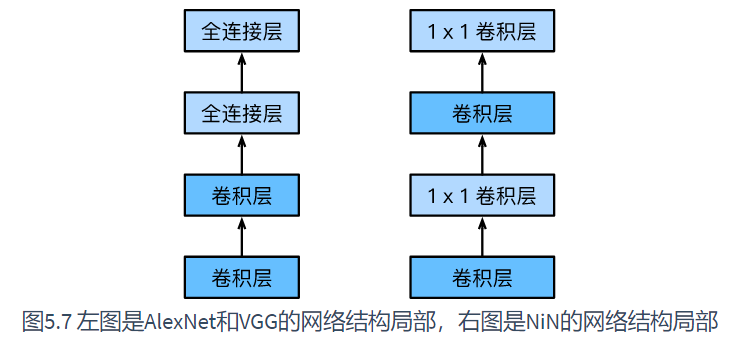

NiN是NiN中的基础块。它由一个卷积层加两个充当全连接层的 1 x 1 卷积层串联而成。其中第一个卷积层的超参数可以自行设置，而第二和第三个卷积层的超参数一般都是固定的。

In [8]:
import time
import torch
from torch import nn, optim


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    blk = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
                        nn.ReLU(),
                        nn.Conv2d(out_channels, out_channels, kernel_size=1),
                        nn.ReLU(),
                        nn.Conv2d(out_channels, out_channels, kernel_size=1),
                        nn.ReLU())
    return blk

## NiN模型

NiN是在 AlexNet问世不久之后提出的。他们的卷积层设定有类似之处，NiN使用卷积窗口形状分别为11X11.5X5,3X3的卷积层，相应的输出通道数也与AlexNet中的一致。每个NiN块后接一个步幅为2、窗口形状为3×3的最大池化层。

除使用NiN块以外，NiN还有一个设计与AlexNet显著不同：**NiN去掉了AlexNet最后的3个全连接层，取而代之地，NiN使用了输出通道数等于标签类别数的NiN块**，，然后使用全局平均池化层对每个通道中所有元素求平均并直接用于分类。这里的全局平均池化层即窗口形状等于输入空间维形状的平均池化层。NiN的这个设计的好处是可以显著减小模型参数尺寸，从而缓解过拟合。然而，该设计有时会造成获得有效模型的训练时间的增加。

In [13]:
# 已保存在d2lzh_pytorch
import torch.nn.functional as F
class GlobalAvgPool2d(nn.Module):
    # 全局平均池化层可通过将池化窗口形状设置成输入的高和宽实现
    def __init__(self):
        super(GlobalAvgPool2d, self).__init__()
    def forward(self, x):
        return F.avg_pool2d(x, kernel_size=x.size()[2:])

net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, stride=4, padding=0),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nin_block(96, 256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nin_block(256, 384, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=3, stride=2), 
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, stride=1, padding=1),
    GlobalAvgPool2d(), )
    # 将四维的输出转成二维的输出，其形状为(批量大小, 10)
    #d2l.FlattenLayer())


# 含并行连结的网络(GoogLeNet)

## Inception块

GoogLeNet中的基础卷积块叫作Inception块，得名于同名电影《盗梦空间》（Inception）。与上一节介绍的NiN块相比，这个基础块在结构上更加复杂，如图5.8所示。
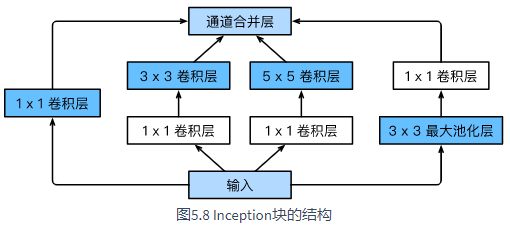

由图5.8可以看出，Inception块里有4条并行的线路。前3条线路使用窗口大小分别是1×11×1、3×33×3和5×55×5的卷积层来抽取不同空间尺寸下的信息，其中中间2个线路会对输入先做1×11×1卷积来减少输入通道数，以降低模型复杂度。第四条线路则使用3×33×3最大池化层，后接1×11×1卷积层来改变通道数。4条线路都使用了合适的填充来使输入与输出的高和宽一致。最后我们将每条线路的输出在通道维上连结，并输入接下来的层中去。

Inception块中可以自定义的超参数是每个层的输出通道数，我们以此来控制模型复杂度。

In [15]:
import time
import torch
from torch import nn, optim
import torch.nn.functional as F

class Inception(nn.Module):
    def __init__(self,in_c,c1,c2,c3,c4):
        super(Inception,self).__init__()
        # 线路1，单 1 x 1 卷积层
        self.p1_1 = nn.Conv2d(in_c.c1,kernel_size=1)
        # 线路2，1 x 1卷积层后接3 x 3卷积层
        self.p2_1 = nn.Conv2d(in_c, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1 x 1卷积层后接5 x 5卷积层
        self.p3_1 = nn.Conv2d(in_c, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3 x 3最大池化层后接1 x 1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_c, c4, kernel_size=1)
    
    def forward(self,x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        return torch.cat((p1, p2, p3, p4), dim=1)  # 在通道维上连结输出
        
        
        

## GoogLeNet模型

GoogLeNet模型和VGG一样，在主体卷积部分中使用了5个模块（block）,每个模块之间使用步幅为2的 3 x 3 最大池化层来减小输出高宽。第一模块使用了一个64通道的 7 X 7卷积层。

# 批量归一化

本节我们介绍批量归一化(batch normalization)层，它能让较深的神经网络的训练变得更加容易 [1]。在3.16节（实战Kaggle比赛：预测房价）里，我们对输入数据做了标准化处理：处理后的任意一个特征在数据集中所有样本上的均值为0、标准差为1。标准化处理输入数据使各个特征的分布相近：这往往更容易训练出有效的模型。

通常来说，数据标准化预处理对于浅层模型就足够有效了。随着模型训练的进行，当每层中参数更新时，**靠近输出层的输出较难出现剧烈变化**。但对深层神经网络来说，即使输入数据已做标准化，训练中模型参数的更新依然很容易造成靠近输出层输出的剧烈变化。这种计算数值的不稳定性通常令我们难以训练出有效的深度模型。

批量归一化的提出正是为了应对深度模型训练的挑战。在模型训练时，批量归一化利用小批量上的均值和标准差，不断调整神经网络中间输出，从而使整个神经网络在各层的中间输出的数值更稳定。**批量归一化和下一节将要介绍的残差网络为训练和设计深度模型提供了两类重要思路。**

## 批量归一化层

对 **全连接层** 和 **卷积层** 做批量归一化的方法稍有不同。下面我们将分别介绍这两种情况下的批量归一化

### 对全连接层做批量归一化

我们先考虑如何对全连接层做批量归一化。通常，我们将批量归一化层置于全连接层中的仿射变换和激活函数之间。设全连接层的输入为$u$，权重参数和偏差参数分别为$W$和$b$，激活函数为$\phi$。设批量归一化的运算符为$BN$。那么，使用批量归一化的全连接层的输出为
$$
\phi (BN(x)),
$$
其中，批量归一化输入x由仿射变换
$$
x = Wu+b
$$
得到，考虑一个由m个样本组成的小批量，仿射变换的输出为一个新的小批量 $\beta = \{x^{(1)},...,x^{(m)}\}$.他们正是批量归一化层的输入。对于小批量 $\beta$中的任意样本，批量归一化层的输出同样是d维向量
$$
y^{(i)} = BN(x^{(i)}),
$$
并由一下几步求得，首先，对小批量 $\beta$ 求均值和方差：
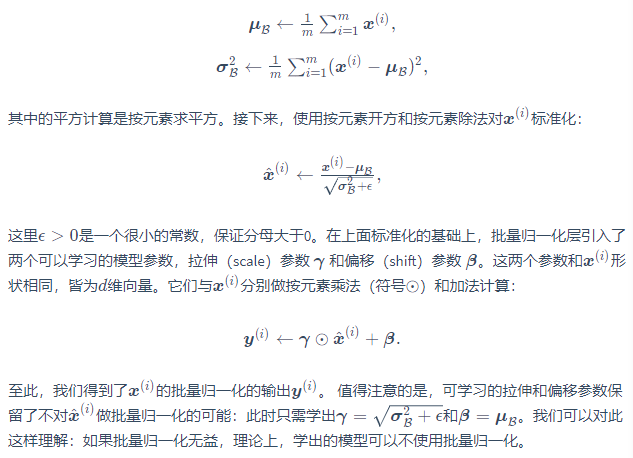

### 对卷积层做批量归一化

对卷积层来说，批量归一化发生在卷积计算之后，应用激活函数之前。如果卷积计算输出多个通道，我们需要对这些通道的输出分别做批量归一化，且**每个通道都拥有独立的拉伸和偏移参数**，并均为标量。设小批量中有m个样本。在单个通道上，假设卷积计算输出的高和宽分别为p和q。我们需要对该通道中m×p×q个元素同时做批量归一化。对这些元素做标准化计算时，我们使用相同的均值和方差，即该通道中m×p×q个元素的均值和方差。

### 预测时的批量归一化

使用批量归一化训练时，我们可以将批量大小设得大一点，从而使批量内样本的均值和方差的计算都较为准确。将训练好的模型用于预测时，我们希望模型对于任意输入都有确定的输出。因此，单个样本的输出不应取决于批量归一化所需要的随机小批量中的均值和方差。一种常用的方法是通过移动平均估算整个训练数据集的样本均值和方差，并在预测时使用它们得到确定的输出。可见，和丢弃层一样，批量归一化层在训练模式和预测模式下的计算结果也是不一样的。

## 从零开始实现

In [33]:
import time
import torch
from torch import nn, optim
import torch.nn.functional as F
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def batch_norm(is_training,X,gamma,beta,moving_mean,moving_var,eps,momentum):
    # 判断当前模式为训练模式还是预测模式
    if not is_training:
        # 如果是在预测模式下，直接使用传入的移动平均所得的均值和方差
        x_hat = (X-moving_mean)/ torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2,4)
        if len(X.shape) == 2:
            # 使用全连接层的情况，计算特征维上的均值和方差
            mean = X.mean(dim=0)
            var = ((X-mean) ** 2).mean(dim=0)
        else:
            # 使用二维卷积层的情况，计算通道维上（axis=1）的均值和方差。这里我们X的形状
            # 一以便后面可以做广播运算
            mean = X.mean(dim=0,keepdim=True).mean(dim=2,keepdim=True)\
            .mean(dim=3,keepdim=True)
            var = ((X-mean) ** 2 ).mean(dim=0,keepdim=True).mean(dim=2, keepdim=True)\
            .mean(dim=3, keepdim=True)
            # 训练模式下用当前的均值和方差做标准化
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # 更新移动平均的均值和方差
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # 拉伸和偏移
    return Y, moving_mean, moving_var

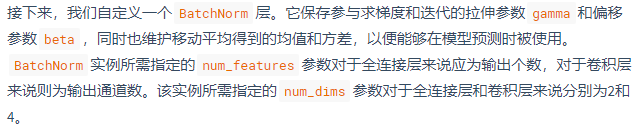

In [35]:
class BatchNorm(nn.Module):
    def __init__(self,num_features,num_dims):
        super(BatchNorm,self).__init__()
        if num_dims == 2:
            shape = (1,num_features)
        else:
            shape = (1,num_features,1,1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成0和1
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # 不参与求梯度和迭代的变量，全在内存上初始化成0
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.zeros(shape)
    
    def forward(self,X):
        # 如果X不在内存上，将 moving_mean和 moving_var复制到X所在显存上
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # 保存更新过的moving_mean和moving_var, 
        # Module实例的traning属性默认为true, 调用.eval()后设成false
        Y, self.moving_mean, self.moving_var = batch_norm(self.training, 
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y
    
        
        

### 使用批量归一化层的LeNet

In [37]:
net = nn.Sequential(
            nn.Conv2d(1, 6, 5), # in_channels, out_channels, kernel_size
            BatchNorm(6, num_dims=4),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), # kernel_size, stride
            nn.Conv2d(6, 16, 5),
            BatchNorm(16, num_dims=4),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2),
            # d2l.FlattenLayer(),
            nn.Linear(16*4*4, 120),
            BatchNorm(120, num_dims=2),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            BatchNorm(84, num_dims=2),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )


In [38]:
print(net)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm()
  (2): Sigmoid()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm()
  (6): Sigmoid()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Linear(in_features=256, out_features=120, bias=True)
  (9): BatchNorm()
  (10): Sigmoid()
  (11): Linear(in_features=120, out_features=84, bias=True)
  (12): BatchNorm()
  (13): Sigmoid()
  (14): Linear(in_features=84, out_features=10, bias=True)
)


In [44]:
net[1].gamma.view((-1)),net[1].beta.view((-1,))

(tensor([1., 1., 1., 1., 1., 1.], grad_fn=<ViewBackward>),
 tensor([0., 0., 0., 0., 0., 0.], grad_fn=<ViewBackward>))

# 残差网络(Resnet)

让我们先思考一个问题：对神经网络模型添加新的层，充分训练后的模型是否只可能更有效地降低训练误差？理论上，原模型解的空间只是新模型解的空间的子空间。也就是说，如果我们能将新添加的层训练成恒等映射f(x)=x，新模型和原模型将同样有效。由于新模型可能得出更优的解来拟合训练数据集，因此添加层似乎更容易降低训练误差。然而在实践中，添加过多的层后训练误差往往不降反升。即使利用批量归一化带来的数值稳定性使训练深层模型更加容易，该问题仍然存在。针对这一问题，何恺明等人提出了残差网络（ResNet） [1]。它在2015年的ImageNet图像识别挑战赛夺魁，并深刻影响了后来的深度神经网络的设计。

## 残差块

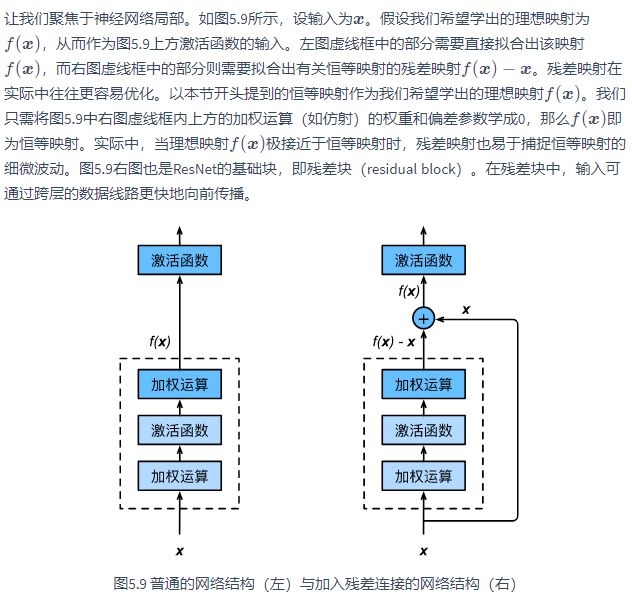


ResNet沿用了VGG全3X3卷积层的设计，残差块里首先有2个相同输出通道数的 3X3卷积层。每个卷积层后接一个批量归一化层和ReLU激活函数。然后我们将输入跳过这两个卷积运算后直接加在最后的ReLU激活函数前。这样的设计要求两个卷积层的输出与输入形状一样，从而可以相加。如果想改变通道数，就需要引入一个额外的1×1卷积层来将输入变换成需要的形状后再做相加运算。

残差块的实现如下。它可以设定输出通道数、是否使用额外的1×1卷积层来修改通道数以及卷积层的步幅。

In [46]:
import time
import torch
from torch import nn, optim
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class Residual(nn.Module):  # 本类已保存在d2lzh_pytorch包中方便以后使用
    def __init__(self, in_channels, out_channels, use_1x1conv=False, stride=1):
        super(Residual, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=stride)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        return F.relu(Y + X)
    


In [47]:
blk = Residual(3, 3)
X = torch.rand((4, 3, 6, 6))
blk(X).shape # torch.Size([4, 3, 6, 6])

torch.Size([4, 3, 6, 6])

In [48]:
print(blk)


Residual(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [50]:
for name,para in blk.named_children():
    print(name,para)

conv1 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv2 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
bn1 BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
bn2 BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


## 稠密连接网络(DenseNet)

ResNet中的跨层连接设计引申出了数个后续工作。本节我们介绍其中的一个：稠密连接网络（DesNet），它与ResNet的区别如下：

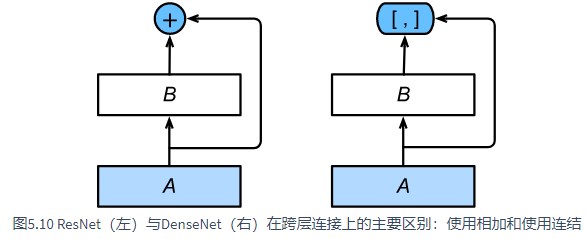

图5.10中将部分前后相邻的运算抽象为模块A和模块B。与ResNet的主要区别在于，DenseNet里模块BB的输出不是像ResNet那样和模块A的输出相加，而是在通道维上连结。这样模块A的输出可以直接传入模块B后面的层。在这个设计里，模块A直接跟模块BB后面的所有层连接在了一起。这也是它被称为“稠密连接”的原因。

DenseNet的主要构建模块是稠密块（dense block）和过渡层（transition layer）。前者定义了输入和输出是如何连结的，后者则用来控制通道数，使之不过大。

In [52]:
import time
import torch
from torch import nn, optim
import torch.nn.functional as F


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def conv_block(in_channels, out_channels):
    blk = nn.Sequential(nn.BatchNorm2d(in_channels), 
                        nn.ReLU(),
                        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
    return blk


稠密块由多个conv_block组成，每块使用相同的输出通道数。但在前向计算时，我们将每块的输入和输出在通道维上连结。

In [58]:
class DenseBlock(nn.Module):
    def __init__(self,num_convs,in_channels,out_channels):
        super(DenseBlock,self).__init__()
        net = []
        for i in range(num_convs):
            in_c = in_channels + i * out_channels
            net.append(conv_block(in_c, out_channels))
        self.net = nn.ModuleList(net)
        self.out_channels = in_channels + num_convs * out_channels # 计算输出通道数
    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            X = torch.cat((X, Y), dim=1)  # 在通道维上将输入和输出连结
        return X

            

In [59]:
blk = DenseBlock(2, 3, 10)
X = torch.rand(4, 3, 8, 8)
Y = blk(X)
Y.shape # torch.Size([4, 23, 8, 8])


torch.Size([4, 23, 8, 8])

## 过渡层

由于每个稠密块都会带来通道数的增加，使用过多则会带来过于复杂的模型。过渡层用来控制模型复杂度。它通过1×1卷积层来减小通道数，并使用步幅为2的平均池化层减半高和宽，从而进一步降低模型复杂度。

In [60]:
def transition_block(in_channels, out_channels):
    blk = nn.Sequential(
            nn.BatchNorm2d(in_channels), 
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, kernel_size=1),
            nn.AvgPool2d(kernel_size=2, stride=2))
    return blk
